<a href="https://colab.research.google.com/github/KarenPachon/Tarea-T-picos-/blob/main/Tarea5_Redes_neuronales_para_clasificacioncorregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TAREA 5**

# Variables cuantitativas de entrada

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving asriosgu_fetal2020.csv to asriosgu_fetal2020.csv


In [ ]:
import io
tabla = pd.read_csv(io.BytesIO(uploaded['asriosgu_fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1')
tabla.head(4)

<ipython-input-4-25c314eaf7dc>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io.BytesIO(uploaded['asriosgu_fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1')


,COD_MUNIC,A_DEFUN,SIT_DEFUN,OTRSITIODE,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,SEXO,...,C_MUERTEB,C_MUERTEC,C_MUERTED,C_MUERTEE,ASIS_MED,CAUSA_MULT,C_BAS1,CAUSA_667,IDPROFCER,CAU_HOMOL
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
70,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,1,...,1.0,NaN,NaN,NaN,1,P059/P011,P011,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80


In [ ]:
df = tabla[["SEXO", "P_PMAN_IRIS", "PESO_NAC", "T_GES", "ASIS_MED"]]
df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)
df.head(4)

<ipython-input-8-ab0356dd131b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)


,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES,ASIS_MED
COD_DPTO,,,,,
70,3,nan,9,1,1
11,3,0.0,1,1,1
11,1,0.0,1,2,1
11,3,nan,1,1,1


In [ ]:
df.loc[(df.P_PMAN_IRIS == "nan"), 'P_PMAN_IRIS'] = "6"
df.head(2)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES,ASIS_MED
COD_DPTO,,,,,
70,3,6,9,1,1
11,3,0.0,1,1,1


In [ ]:
# from sklearn.impute import SimpleImputer
# simple = SimpleImputer(strategy='most_frequent')
# df = simple.fit_transform(df)
df = pd.DataFrame(df, columns = ["SEXO", "P_PMAN_IRIS", "PESO_NAC", "T_GES", "ASIS_MED"])
df.head(4)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES,ASIS_MED
COD_DPTO,,,,,
70,3,6,9,1,1
11,3,0.0,1,1,1
11,1,0.0,1,2,1
11,3,6,1,1,1


In [ ]:
# df["SEXO"] = df.SEXO.astype(str)
# df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)
# df["PESO_NAC"] = df.PESO_NAC.astype(str)
# df["T_GES"] = df.T_GES.astype(str)
df["ASIS_MED"] = df.ASIS_MED.astype(str)
df.head(4)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES,ASIS_MED
COD_DPTO,,,,,
70,3,6,9,1,1
11,3,0.0,1,1,1
11,1,0.0,1,2,1
11,3,6,1,1,1


In [ ]:
# df.loc[(df.SEXO == "3.0"), 'SEXO'] = "Indeterminado"
# df.loc[(df.SEXO == "1.0"), 'SEXO'] = "Masculino"
# df.loc[(df.SEXO == "2.0"), 'SEXO'] = "Femenino"
df.loc[(df.ASIS_MED == "3"), 'ASIS_MED'] = "Ignorado"
df.loc[(df.ASIS_MED == "1"), 'ASIS_MED'] = "Si"
df.loc[(df.ASIS_MED == "2"), 'ASIS_MED'] = "No"
print(df)

          SEXO P_PMAN_IRIS  PESO_NAC  T_GES ASIS_MED
COD_DPTO                                            
70           3           6         9      1       Si
11           3         0.0         1      1       Si
11           1         0.0         1      2       Si
11           3           6         1      1       Si
11           2           6         3      3       Si
...        ...         ...       ...    ...      ...
41           3           6         1      1       Si
11           3           6         9      1       Si
11           3         0.0         9      1       Si
76           3           6         1      1       Si
11           3         0.0         1      1       Si

[33327 rows x 5 columns]


In [ ]:
x = df.drop("ASIS_MED", axis=1)
y = df["ASIS_MED"]
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.7)
trainX

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
11,2,6,2,2
11,3,6,1,1
81,3,0.0,9,1
23,3,6,1,1
11,3,6,1,9
...,...,...,...,...
47,1,6,5,3
76,3,6,1,9
76,3,6,1,1


In [ ]:
sc=StandardScaler()
# scaler = sc.fit(trainX)
# trainX_scaled = scaler.transform(trainX)
# testX_scaled = scaler.transform(testX)

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,20),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')
mlp_clf.fit(trainX, trainY)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [ ]:
y_pred = mlp_clf.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.97


In [ ]:
no_obs = np.array([[1.0,	1.0,	1.0,	4.0]])
mlp_clf.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['Si'], dtype='<U2')

In [ ]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(testY, y_pred)

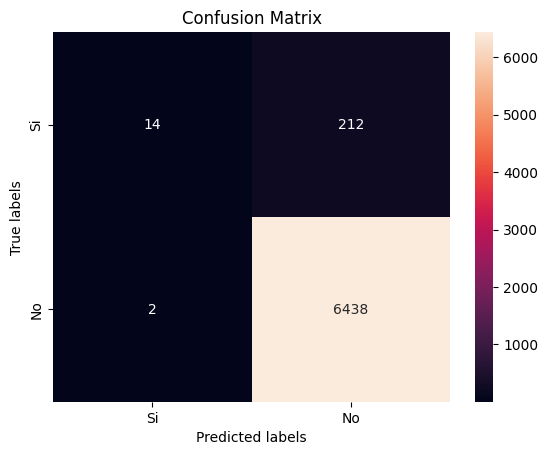

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Si', 'No']); ax.yaxis.set_ticklabels(['Si', 'No']);

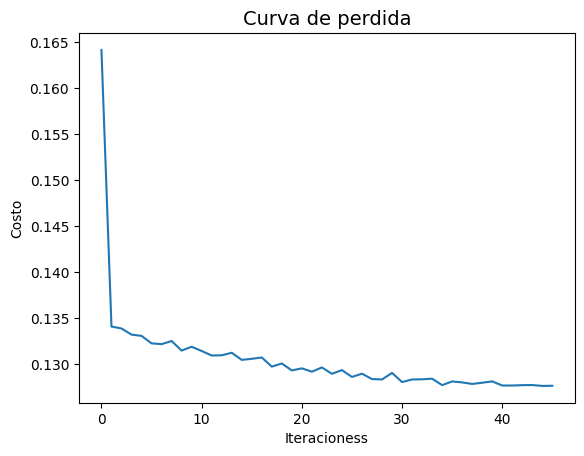

In [ ]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Curva de perdida", fontsize=14)
plt.xlabel('Iteracioness')
plt.ylabel('Costo')
plt.show()

In [ ]:
pd.get_dummies(x['SEXO'], dtype=float)

,1,2,3
COD_DPTO,,,
70,0.0,0.0,1.0
11,0.0,0.0,1.0
11,1.0,0.0,0.0
11,0.0,0.0,1.0
11,0.0,1.0,0.0
...,...,...,...
41,0.0,0.0,1.0
11,0.0,0.0,1.0
11,0.0,0.0,1.0


# Variables cualitativas de entrada
La forma correcta de analizar las variables. Como son variables cualitativas, podemos transformar cada variable cualitativa en un conjunto de variables Dummie.

In [ ]:
dummi1 = pd.get_dummies(x['SEXO'], dtype=float)
dummi1.columns = ['Masc', 'Fem', 'Desc']
dummi2 = pd.get_dummies(x['P_PMAN_IRIS'], dtype=float)
dummi2.columns = ["Natural", "Homicidio", "Accidente", "Pendiente", "Indeterminado", "Desconocido", "Guerra"]
dummi3 = pd.get_dummies(x['T_GES'], dtype=float)
dummi3.columns = ["< 22 sem", "22-27 sem", "28-37 sem", "38-41 sem", "> 42 sem", "Sin info"]
dummi = pd.concat([dummi1, dummi2, dummi3, y], axis=1)
dummi.head(4)

,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,Guerra,...,3.5-4 Kg,> 4 Kg,Kg desco,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info,ASIS_MED
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Si
11,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Si
11,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Si
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Si


In [ ]:
x1 = dummi.drop("ASIS_MED", axis=1)
x1
y1 = dummi["ASIS_MED"]
train1, test1, train2, test2 = train_test_split(x1, y1, test_size = 0.2)
train1

,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,Guerra,...,3-3.5 Kg,3.5-4 Kg,> 4 Kg,Kg desco,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
76,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
41,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mlp_clf1 = MLPClassifier(hidden_layer_sizes=(150,100,50),
                         max_iter = 300,activation = 'relu',
                         solver = 'adam')
df.head(4)
mlp_clf1.fit(train1, train2)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [ ]:
y_pred1 =  pd.DataFrame(mlp_clf1.predict(test1))
y_pred1.columns = ["aa"]
print('Exactitud: {:.2f}'.format(accuracy_score(test2, y_pred)))

Exactitud: 0.96


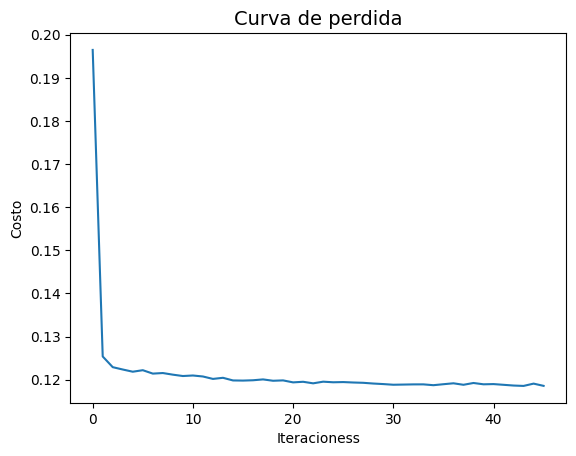

In [ ]:
plt.plot(mlp_clf1.loss_curve_)
plt.title("Curva de perdida", fontsize=14)
plt.xlabel('Iteracioness')
plt.ylabel('Costo')
plt.show()

In [ ]:
no_obs1 = np.array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
# ['Masc', 'Fem', 'Desc', "Natural", "Homicidio", "Accidente", "Pendiente", "Indeterminado", "Desconocido", "Guerra", "< 1 Kg", "1-1.5 Kg", "1.5-2 Kg",
#  "2-2.5 Kg", "2.5-3 Kg", "3-3.5 Kg", "3.5-4 Kg", "> 4 Kg", "Kg desco", "< 22 sem", "22-27 sem", "28-37 sem", "38-41 sem", "> 42 sem", "Sin info"]
mlp_clf1.predict(no_obs1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['Si'], dtype='<U2')

# Un ejemplo para encontrar criterios para escoger la red

In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = iris_data.target
X.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(32, 42, 42, 42, 52, 42), activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.97


In [ ]:
clf.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (32, 42, 42, 42, 52, 42),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

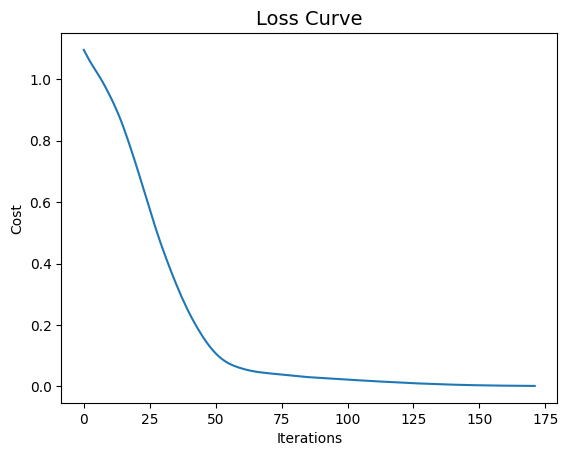

In [ ]:
plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
no_obs = np.array([[1.5,	1.4,	1.3,	4.2]])
clf.predict(no_obs)

array([2])

In [ ]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [ ]:
clf.predict([[2., 2.]])

array([1])

In [ ]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

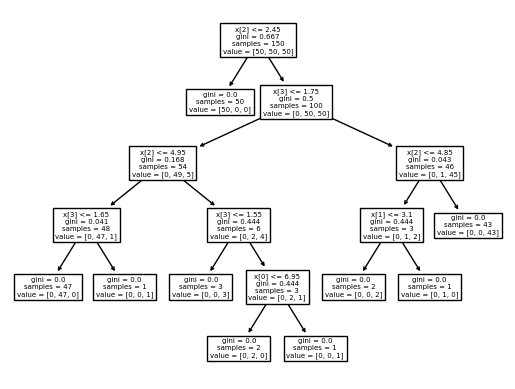

In [ ]:
tree.plot_tree(clf)

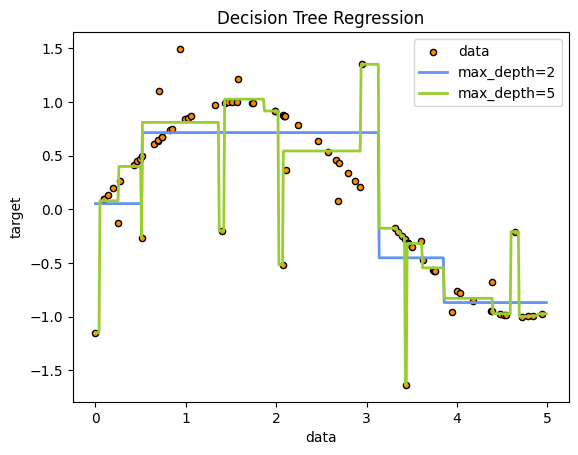

In [ ]:
# Import the necessary modules and libraries
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()